<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("df1.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


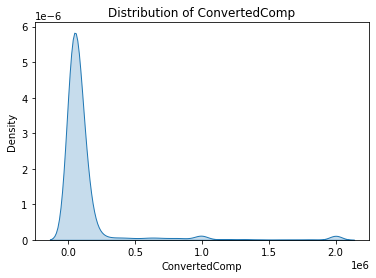

In [3]:
# your code goes here
column_name = 'ConvertedComp'
sns.kdeplot(df[column_name], shade=True)
plt.title('Distribution of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Density')
plt.show()

Plot the histogram for the column `ConvertedComp`.


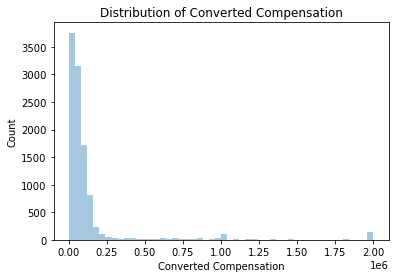

In [4]:
# your code goes here
sns.distplot(df['ConvertedComp'], kde=False, bins=50)
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Count')
plt.show()

What is the median of the column `ConvertedComp`?


In [5]:
# your code goes here
median = df['ConvertedComp'].median()
print("Median of ConvertedComp column:", median)


Median of ConvertedComp column: 57745.0


In [6]:
print(df['Gender'].value_counts())

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64


How many responders identified themselves only as a **Man**?


In [7]:
# your code goes here
vc = df['Gender'].value_counts()
num_men = vc.loc[['Man']]
print(num_men)

Man    10480
Name: Gender, dtype: int64


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
# your code goes here
women_df = df[df['Gender'] == 'Woman']
median_women = women_df['ConvertedComp'].median()
print("Median of ConvertedComp column for women:", median_women)

Median of ConvertedComp column for women: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [9]:
# your code goes here

age_summary = df['Age'].describe(percentiles=[.25, .5, .75])
q1 = age_summary['25%']
median = age_summary['50%']
q3 = age_summary['75%']
iqr = q3 - q1
minimum = age_summary['min']
maximum = age_summary['max']

print("Five Number Summary for Age column:")
print("Minimum:", minimum)
print("Q1:", q1)
print("Median:", median)
print("Q3:", q3)
print("Maximum:", maximum)


Five Number Summary for Age column:
Minimum: 16.0
Q1: 25.0
Median: 29.0
Q3: 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


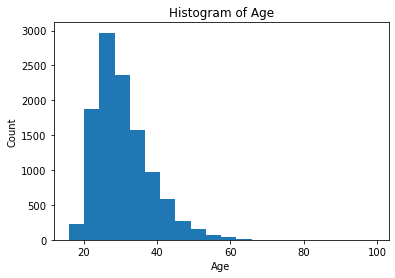

In [10]:
# your code goes here
plt.hist(df['Age'], bins=20)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [11]:
convertedcomp_median=df['ConvertedComp'].median()
print(convertedcomp_median)

57745.0


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:xlabel='ConvertedComp'>

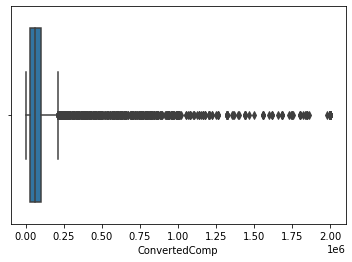

In [12]:
# your code goes here
sns.boxplot(x=df['ConvertedComp'])

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [13]:
# your code goes here
converted_comp = df['ConvertedComp']
q1 = np.nanpercentile(converted_comp, 25)
q3 = np.nanpercentile(converted_comp, 75)
iqr = q3 - q1

print("Interquartile range for ConvertedComp column:", iqr)

Interquartile range for ConvertedComp column: 73132.0


Find out the upper and lower bounds.


In [14]:
# your code goes here
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

print("Lower bound for ConvertedComp column:", lower_bound)
print("Upper bound for ConvertedComp column:", upper_bound)

Lower bound for ConvertedComp column: -82830.0
Upper bound for ConvertedComp column: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [15]:
# your code goes here
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

print("Number of outliers in ConvertedComp column:", len(outliers))

Number of outliers in ConvertedComp column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [16]:
# your code goes here
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

print("New dataframe shape after removing outliers:", df_no_outliers.shape)

New dataframe shape after removing outliers: (9703, 87)


In [19]:
convertedcomp_median2=df_no_outliers['ConvertedComp'].median()
print(convertedcomp_median2)

52704.0


In [21]:
convertedcomp_mean=df_no_outliers['ConvertedComp'].mean()
print(convertedcomp_mean)

59883.20838915799


<AxesSubplot:xlabel='Age'>

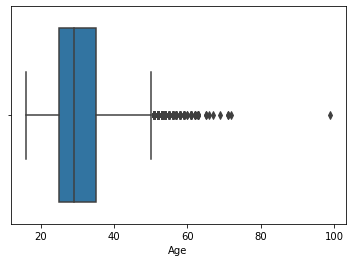

In [20]:
sns.boxplot(x=df['Age'])

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [17]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('Age')

correlations = df[['Age'] + numerical_cols].corr()

print("Correlation between Age and all other numerical columns:")
print(correlations['Age'])

Correlation between Age and all other numerical columns:
Age                             1.000000
Unnamed: 0                      0.004188
Respondent                      0.004041
CompTotal                       0.006970
ConvertedComp                   0.105386
WorkWeekHrs                     0.036518
CodeRevHrs                     -0.020469
NormalizedAnnualCompensation   -0.005222
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
